In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data_df = pd.merge(city_data_df, ride_data_df, how = 'outer', on = 'city' )
# Display the data table for preview
pyber_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
driver_count_df=pyber_data_df.drop(["date","fare","ride_id"], axis = 1)
driver_count_df=driver_count_df.drop_duplicates(subset="city",keep='first')
driver_count_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
28,Williamsstad,59,Urban
51,Port Angela,67,Urban
70,Rodneyfort,34,Urban
93,West Robert,39,Urban


In [3]:
urban_mean_df = driver_count_df.loc[pyber_data_df['type'] == "Urban"]
urban_combined_df = pyber_data_df.groupby(["city"]).mean()['driver_count']

In [4]:
suburban_mean_df = driver_count_df.loc[pyber_data_df['type'] == "Suburban"]
suburban_combined_df = pyber_data_df.groupby(['city']).mean()['driver_count']

In [5]:
rural_mean_df = driver_count_df.loc[pyber_data_df['type'] == "Rural"]
rural_combined_df = pyber_data_df.groupby(['city']).mean()['driver_count']


In [6]:
rural_combined_df.head()

city
Amandaburgh      12.0
Barajasview      26.0
Barronchester    11.0
Bethanyland      22.0
Bradshawfurt      7.0
Name: driver_count, dtype: float64

In [7]:
urban_df = pyber_data_df.loc[ pyber_data_df['type']== "Urban"]
urban_grouped_df = urban_df.groupby("city")
urban_x = urban_grouped_df["ride_id"].count()
urban_x.head()
urban_y = pd.DataFrame(urban_grouped_df["fare"].mean()).round()
urban_y.head()

,fare
city,
Amandaburgh,25.0
Barajasview,25.0
Carriemouth,28.0
Christopherfurt,25.0
Deanville,26.0


In [8]:
suburban_df = pyber_data_df.loc[ pyber_data_df['type']== "Suburban"]
suburban_grouped_df = suburban_df.groupby("city")
suburban_x = suburban_grouped_df["ride_id"].count()
suburban_x.head()
suburban_y = pd.DataFrame(suburban_grouped_df["fare"].mean()).round()
suburban_y.head()

,fare
city,
Barronchester,36.0
Bethanyland,33.0
Brandonfort,35.0
Colemanland,31.0
Davidfurt,32.0


In [9]:
rural_df = pyber_data_df.loc[ pyber_data_df['type']== "Rural"]
rural_grouped_df = rural_df.groupby("city")
rural_x = rural_grouped_df["ride_id"].count()
rural_x.head()
rural_y = pd.DataFrame(rural_grouped_df["fare"].mean()).round()
rural_y.head()

,fare
city,
Bradshawfurt,40.0
Garzaport,24.0
Harringtonfort,33.0
Jessicaport,36.0
Lake Jamie,34.0


In [10]:
#* City Type (Urban, Suburban, Rural)
groupby_type_df = pyber_data_df.groupby(['type','city']).sum()
groupby_type_df.head()




driver_count    fare         ride_id
type  city                                                
Rural Bradshawfurt              70  400.64  37352940220451
      Garzaport                 21   72.37  17847448587502
      Harringtonfort            24  200.82  34358434657936
      Jessicaport                6  216.08  21736803740352
      Lake Jamie                24  206.15  21353310731781

## Bubble Plot of Ride Sharing Data

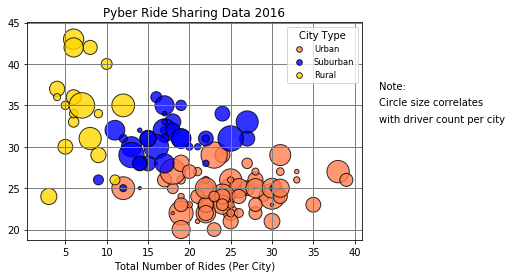

In [11]:
plt.scatter(urban_x,urban_y, s=urban_combined_df*10, c = "coral", marker = "o", alpha = 0.8, edgecolors = "black", label = "Urban")
plt.scatter(suburban_x, suburban_y, s=suburban_combined_df*10 , c = "blue" , marker = "o", alpha = 0.8, edgecolors = "black", label = "Suburban")
plt.scatter(rural_x, rural_y, s=rural_combined_df*10, c = "gold", marker = "o", alpha =0.8, edgecolors = "black", label = "Rural")

plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(color = "grey", linestyle = "-", linewidth = 1)
lgnd = plt.legend(title = "City Type", fontsize = "small", fancybox = True)
lgnd.legendHandles[0]._sizes = [32]
lgnd.legendHandles[1]._sizes = [32]
lgnd.legendHandles[2]._sizes = [32]

plt.text(43,37, "Note:")
plt.text(43,35, "Circle size correlates")
plt.text(43,33, "with driver count per city")
plt.savefig("bubble.png")
plt.show()

## Total Fares by City Type

In [19]:
# Calculate Type Percents
fare_percent_df = pyber_data_df.groupby("type").sum()
total_fare_df = pd.DataFrame(fare_percent_df["fare"])
total_fare_df["fare"]

total_fare_df["percentage"] = total_fare_df["fare"]/total_fare_df["fare"].sum()
total_fare_df
# Build Pie Chart

# Save Figure


,fare,percentage
type,,
Rural,4327.93,0.068115
Suburban,19356.33,0.304639
Urban,39854.38,0.627246


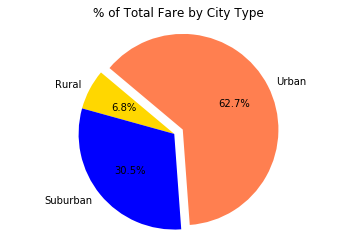

In [20]:
labels = ["Rural", "Suburban", "Urban"]
sizes = [4327.93, 19356.33, 39854.38]
colors = ["gold", "blue", "coral"]

explode = (0,0,0.1)

plt.pie(sizes, labels=labels, explode = explode, autopct="%1.1f%%",colors=colors, counterclock=True, startangle=140)
plt.title("% of Total Fare by City Type")
plt.axis("equal")


plt.show()

In [14]:
# Show Figure
plt.show()

## Total Rides by City Type

In [33]:
# Calculate Ride Percents
ride_percentage_df = pyber_data_df.groupby("type").count()
total_rides = ride_percentage_df["fare"].sum()
ride_percentage_df["percentage"]= ride_percentage_df["fare"]/total_rides
ride_percentage_df


# Build Pie Chart



# Save Figure


,city,driver_count,date,fare,ride_id,percentage
type,,,,,,
Rural,125,125,125,125,125,0.052632
Suburban,625,625,625,625,625,0.263158
Urban,1625,1625,1625,1625,1625,0.684211


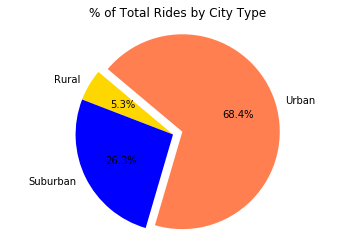

In [22]:
# Show Figure
labels = ["Rural", "Suburban", "Urban"]
sizes = [0.052632, 0.263158, 0.684211]
colors = ["gold", "blue", "coral"]

explode = (0,0,0.1)

plt.pie(sizes, labels=labels, explode = explode, autopct="%1.1f%%",colors=colors, counterclock=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

plt.show()

## Total Drivers by City Type

In [32]:
# Calculate Driver Percents
driver_count_df=pyber_data_df.drop(["date","fare","ride_id"], axis = 1)
driver_count_df=driver_count_df.drop_duplicates(subset="city",keep='first')

urban_df = pyber_data_df.loc[ pyber_data_df['type']== "Urban"]
urban_grouped_df = urban_df.groupby("type").sum()


suburban_df = pyber_data_df.loc[ pyber_data_df['type']== "Suburban"]
suburban_grouped_df = suburban_df.groupby("type").sum()

rural_df = pyber_data_df.loc[ pyber_data_df['type']== "Rural"]
rural_grouped_df = rural_df.groupby("type")

# Build Pie Charts

# Save Figure


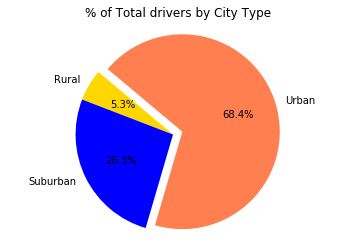

In [34]:
# Show Figure

labels = ["Rural", "Suburban", "Urban"]
sizes = [125, 625, 1625]
colors = ["gold", "blue", "coral"]

explode = (0,0,0.1)

plt.pie(sizes, labels=labels, explode = explode, autopct="%1.1f%%",colors=colors, counterclock=True, startangle=140)
plt.title("% of Total drivers by City Type")
plt.axis("equal")






plt.show()